# Variation in the Atomistic Structures of Free-Standing 2D Perovskites Compared to Their Bulk Cubic Counterparts

Upon the formation of free-standing 2D perovskites, their atomistic structures are expected to change significantly due to the removal of long-ranged crystal periodicity as well as the supporting substrates. Because the changes in the bond lengths and bond angles can play a significant role in determining the stability, mechanical  and electronic properties of free-standing 2D perovskites, it is therefore our primary interest to understand how the bond lengths and bond angles have changed compared to the cubic bulk counterparts, upon forming these nanostructures.  

The structural distortions induced in the BX$_6$ coordination environments are particularly interesting, as the electronic structures and the dynamic stabilities of many perovskites are dictated by the orbital hybridizations between the B-site cation and X-site anion. The structural descriptors developed here are chosen to reflect the averaged changes in B-X bond lengths projected parallel ($\Delta S_{\parallel}$) and perpendicular ($\Delta S_{\perp}$) to the slab cleavage plane compared to the bulk value. Mathematically, they are defined as:
\begin{equation}
    \Delta S_{\eta}=\frac{1}{\max\left(\left\|\mathbf{b}_{\eta,\mathbf{v}}^{Pm\bar{3}m}\right\|\right)} \left[ \frac{1}{n_{2D}}\sum_{i=1}^{n_{2D}}\left\|\mathbf{b}_{\eta,\mathbf{v},i}^{2D} \right\|- 
    \frac{1}{n_{Pm\bar{3}m}}\sum_{i=1}^{n_{Pm\bar{3}m}}\left\|\mathbf{b}_{\eta,\mathbf{v},i}^{Pm\bar{3}m} \right\|
    \right] \quad (\eta=\perp\mbox{or}\parallel).
\end{equation}
In the definition, $\mathbf{b}_{\perp,\mathbf{v},i}$ ($\mathbf{b}_{\parallel,\mathbf{v},i}$) represents the projection of $i$-th B-X bond vector (denoted as $\mathbf{B}_{i}$) projected to the norm (in-plane) vector $\mathbf{v}_z$ ($\mathbf{v}_x$ or $\mathbf{v}_y$) to the  cleavage plane (See the diagram below). In the geometrically optimized 2D models, $\mathbf{v}_{z}\equiv \hat{\mathbf{z}}$, thus $\mathbf{b}_{\perp,\mathbf{v}}^{2D}=\mathbf{B}_{i}\cdot\hat{\mathbf{z}}$, whereas in the bulk $Pm\bar{3}m$ crystals, $\mathbf{v}_z$ points to either $[100]$, $[110]$ or $[111]$ depending on the choice of the   cleavage plane. With this, the in-plane projection of the B-X bond can be subsequently calculated as   $\mathbf{b}_{\parallel,\mathbf{v},i}=\mathbf{B}_{i}-\mathbf{b}_{\perp,\mathbf{v},i}$ for both the bulk and the 2D perovskite structures. $n_{2D}$ or $n_{pm\bar{3}m}$ represent total number of B-X bonds in a given structure.   $\max(\|\mathbf{b}_{\parallel,\mathbf{v}}^{Pm\bar{3}m}\|)$ represents the maximum length of the B-X bond that is projected onto  the cleavage plane  in the cubic bulk structures. Both $\Delta S_\parallel$ and $\Delta S_\perp$ equal to zero if the local B-X coordination environments in the 2D slab are exactly the same as those in the bulk perovskite structure. Physically, $\Delta S_\parallel$ and $\Delta S_\perp$ together characterize the extent of anisotropic structural changes in perovskite upon forming a free-standing 2D structure.


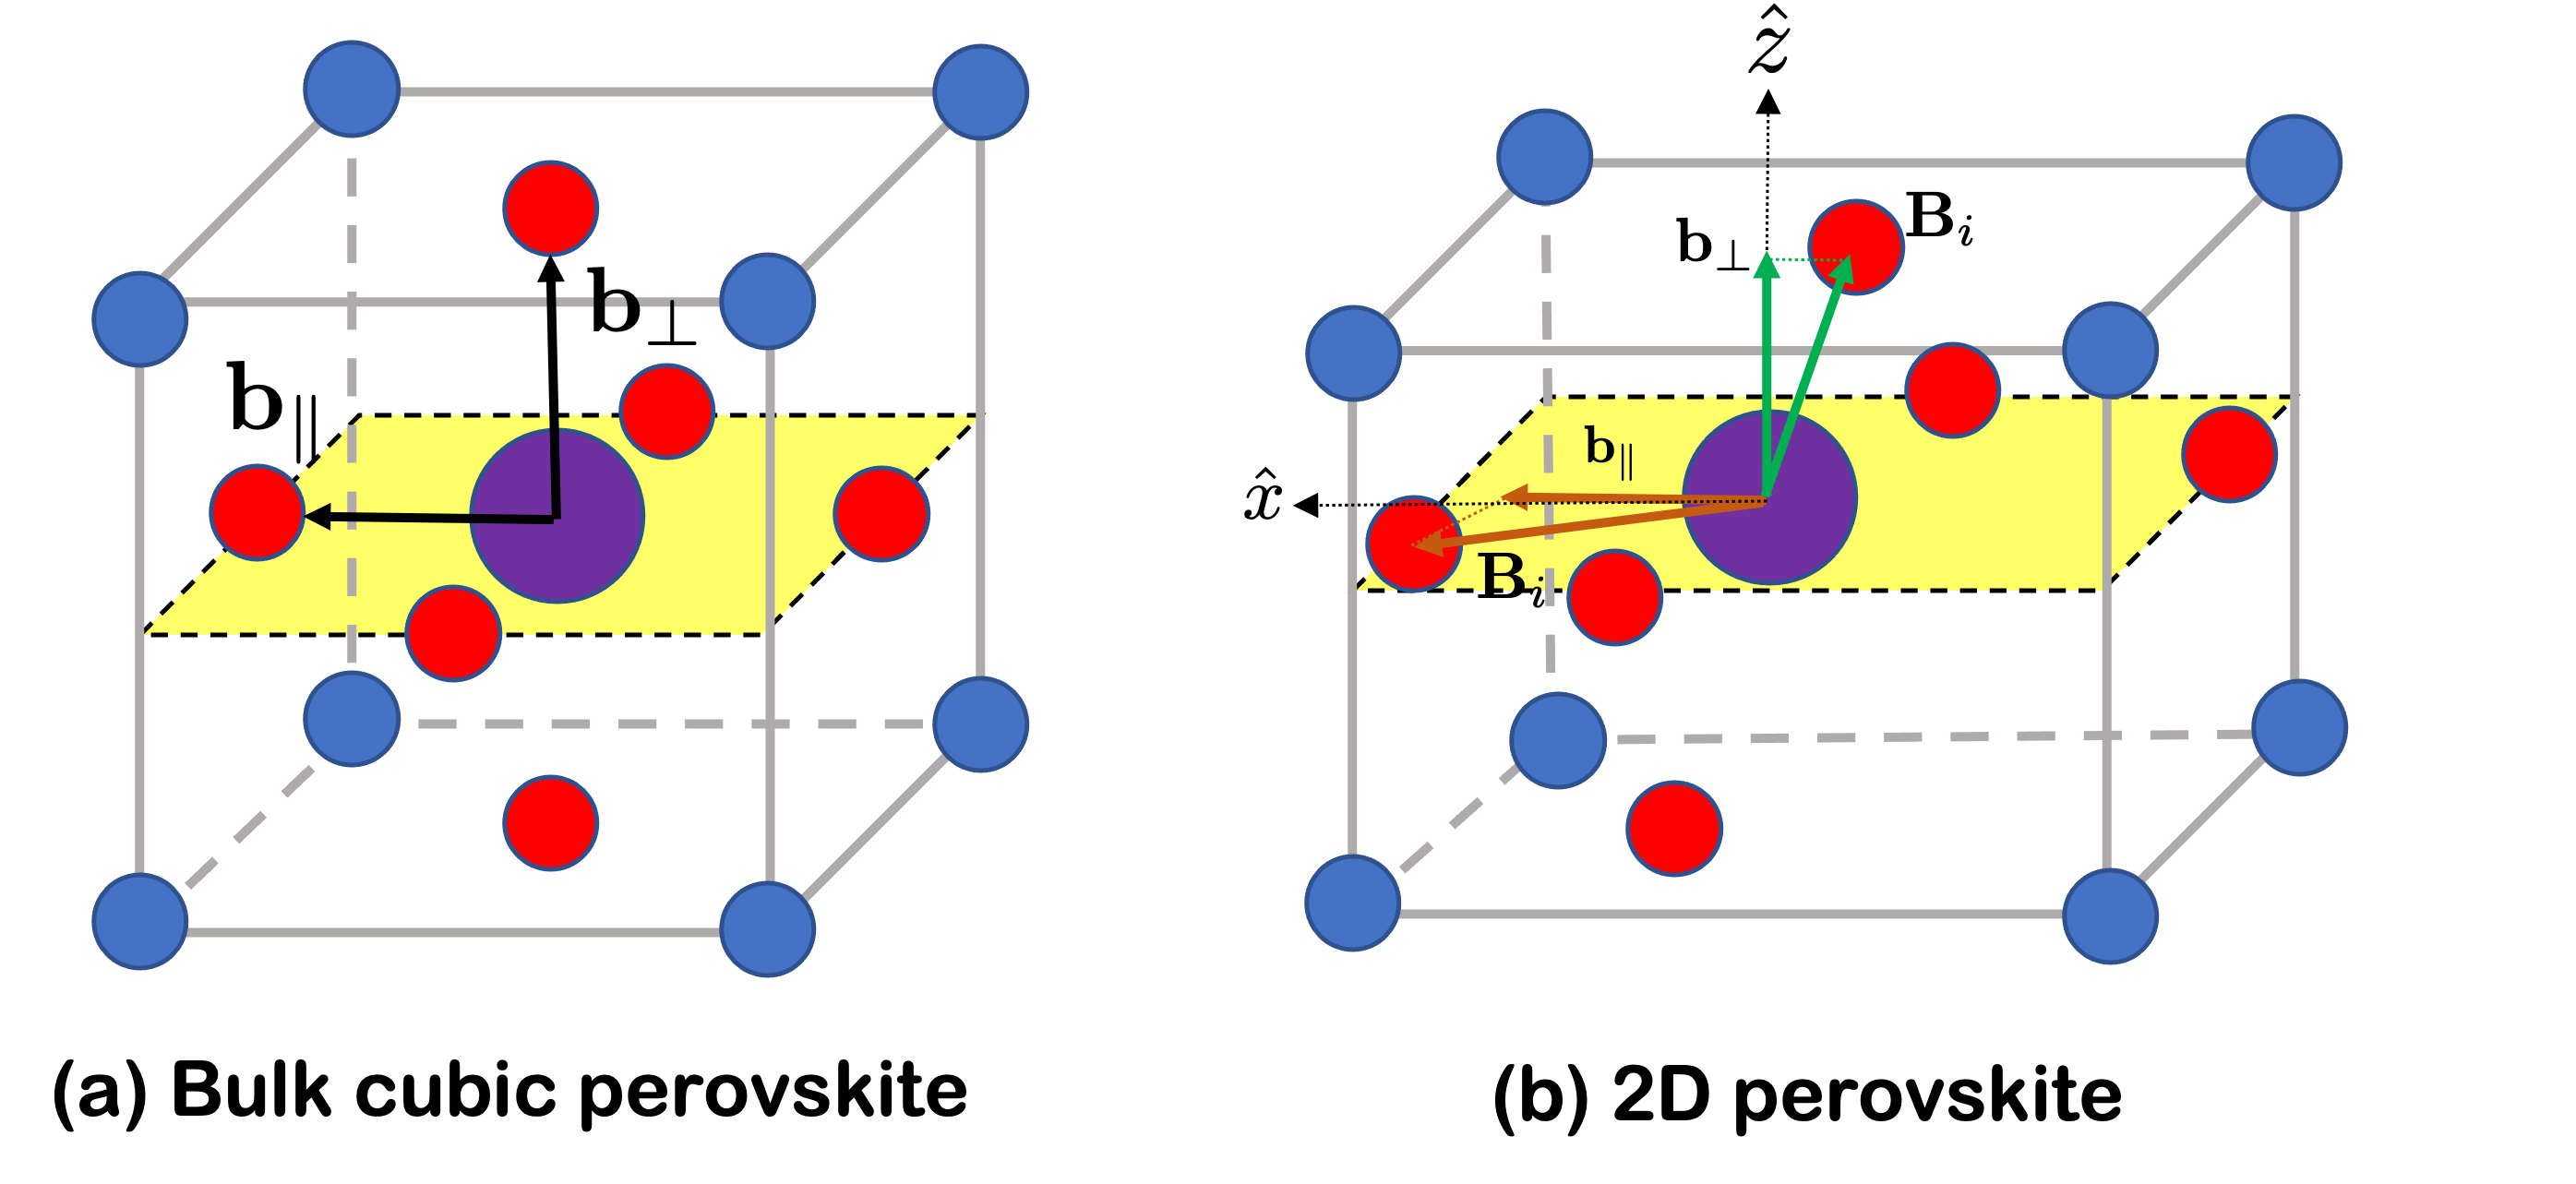

This notebook provides a interactive tools to navigate the landscapes of $\Delta S_{\parallel}$ and $\Delta S_{\perp}$ for free-standing 2D perovskites, that are plotted against the tolerance factors of bulk cubic perovskite counterparts (Fig. 6 in the main manuscript).

In [1]:
try:
    from ase.db import connect
except ImportError:
    !pip install ase
    from ase.db import connect

try:
    import plotly 
except ImportError:
    !pip install plotly
import plotly.graph_objects as go

from utils import *
from element import ionic_radii
import pandas as pd
import numpy as np
import math

In [27]:
#Step I - load all data into a panda dataframe

bulk_db=connect('2dpv_set_bulk.db')
all_data_dict={}
database_counter=0
two_d_out_of_plane_vec=np.array([0.0,0.0,1.0])
for i in range(len(A_site_list)): 
    
    for count_a, a in enumerate(A_site_list[i]):
        for b in B_site_list[i]:
            for c in C_site_list[i]:
                        
                #Get the tolerance factor for the bulk perovskite, this will become the 
                #x-axis for the plot
                tolerance_f = ionic_radii[a][charge_state_A_site[i]] + ionic_radii[c][charge_state_C_site[i]]
                tolerance_f /= ionic_radii[b][charge_state_B_site[i]] + ionic_radii[c][charge_state_C_site[i]]
                tolerance_f /= math.sqrt(2)
                
                #Get the information on the B-X bonds in the bulk perovskites
                bo_vecs_in_pm3m = BO_bond_vectors_in_bulk_perovskite(bulk_db, a, b, c)
                    
                for orientation in ['100', '110', '111']:
                    #projection of bulk B-X vectors onto the desired orientation
                    _or = [float(c) for c in orientation]
                    _or_vec = np.array(_or)
                    _or_vec = _or_vec/np.linalg.norm(_or_vec)
                    
                    bulk_out_comps = [abs(np.dot(bv,_or_vec)) for bv in bo_vecs_in_pm3m]
                    
                    bulk_inplane_comps = [bv - (np.dot(bv,_or_vec)/np.linalg.norm(_or_vec))*_or_vec for bv in bo_vecs_in_pm3m]
                    bulk_inplane_comps = [np.linalg.norm(v) for v in bulk_inplane_comps]
                    bulk_out_comp_max = max(bulk_out_comps)
                    bulk_in_plane_max = max(bulk_inplane_comps)
                    _delta_inplane_bulk = [v / bulk_in_plane_max for v in bulk_inplane_comps]
                    _delta_inplane_bulk = -1.0 * sum(_delta_inplane_bulk) / len(_delta_inplane_bulk)
                    _delta_out_of_plane_bulk = [v / bulk_out_comp_max for v in bulk_out_comps]
                    _delta_out_of_plane_bulk = -1.0 * sum(_delta_out_of_plane_bulk) / len(_delta_out_of_plane_bulk)
                            
                    for term_type in termination_types[orientation]:
                        
                        this_db = connect('2dpv_set_'+orientation+'_'+term_type+'.db')
                        
                        for thick in [9, 5, 7, 3]:  
                            this_data_dict={}
                            two_d_BO_bonds_vec = BO_bond_vectors_in_twod_perovskites(this_db, a, b, c, orientation,
                                                                                         term_type, thick)

                            two_d_out_of_plane_components = [abs(np.dot(v,two_d_out_of_plane_vec)) / bulk_out_comp_max for v in two_d_BO_bonds_vec]
                            
                            two_d_in_plane_components = [v - np.dot(v,two_d_out_of_plane_vec) * two_d_out_of_plane_vec for v in two_d_BO_bonds_vec]
                            two_d_in_plane_components = [np.linalg.norm(v) / bulk_in_plane_max for v in two_d_in_plane_components]

                            _delta_out_of_plane_two_d = sum(two_d_out_of_plane_components) / len(two_d_out_of_plane_components)
                            _delta_inplane_two_d = sum(two_d_in_plane_components) / len(two_d_in_plane_components)

                            _S_out = _delta_out_of_plane_two_d + _delta_out_of_plane_bulk
                            _S_in = _delta_inplane_two_d + _delta_inplane_bulk
                            
                            #for plotting the space charge polarisation data
                            _pol = polarisation(this_db, a, b, c, orientation, term_type, thick)
                            
                            this_data_dict={'chemical_class':i+1,
                                            'system':a+b+c+'3_'+str(orientation)+"_"+str(term_type)+"_"+str(thick),
                                            'system_no_thick':a+b+c+'3_'+str(orientation)+"_"+str(term_type),
                                            'orientation':orientation,
                                            'termination':term_type,
                                            'thickness':thick,
                                            'tolerance_factor':tolerance_f,
                                            'in_plane_variation':_S_in,
                                            'out_of_plane_variation':_S_out,
                                            'space_charge_polarisation':_pol}
                            all_data_dict[database_counter]=this_data_dict
                            database_counter+=1
df = pd.DataFrame(all_data_dict).T

In [28]:
chemical_classes = df['chemical_class'].unique().tolist()
crystallographic_orientations = df['orientation'].unique().tolist()
terminations = df['termination'].unique().tolist()
thicknesses = df['thickness'].unique().tolist()
#Step II - dataframe that is grouped by the chemical class, crystallographic orientations, terminations 
#layer thicknesses 
#We want to separate the plots for 2D perovskites with different thicknesess, as there are too many data in
#the plot, and there is not much significant thickness-dependent on the Gamma point phonon frequencies that
#can be observed anyway.
df_categorized = {}
df_categorized_thick_dependent = {}
for cc in chemical_classes:
    for cd in crystallographic_orientations:
        for term in terminations:
            this_key = str(cc)+'_'+str(cd)+'_'+str(term)
            this_set = df[(df['chemical_class']==cc) & (df['orientation']==cd) & (df['termination']==term)]
            if not this_set.empty:
                df_categorized_thick_dependent[this_key] = this_set
            this_set=None
            
            for thickness in [3,5,7,9]:
                key = str(cc)+'_'+str(cd)+'_'+str(term)+'_'+str(thickness)
                this_set = df[(df['chemical_class']==cc) & (df['orientation']==cd) & (df['termination']==term) & (df['thickness']==thickness)]
            
                if not this_set.empty:
                    df_categorized[key] = this_set
                this_set=None

In [50]:
#Here we reorganize the data a bit so that we can plot the size-dependent 
#changes in delta S_parallel and delta S_perp

#This is basically the same as how it was done for the size-dependent potential energy landscapes
df_reshaped_inplane={}
df_reshaped_outplane={}
df_reshaped_polarisation={}
common_col_dicts={}
for df_item in df_categorized_thick_dependent:
    common_rows=[]
    common_cols=[]
    common_rows=sorted(list(set().union(common_rows,list(df_categorized_thick_dependent[df_item].thickness))))
    common_cols=sorted(list(set().union(common_cols,list(df_categorized_thick_dependent[df_item].system_no_thick))))
    
    df_common_inplane = pd.DataFrame(np.nan, index=common_rows, columns=common_cols)
    df_common_outplane = pd.DataFrame(np.nan, index=common_rows, columns=common_cols)
    df_common_polarisation = pd.DataFrame(np.nan, index=common_rows, columns=common_cols)
    #this is a dumm way to get the number from the original table and repopulated into the reshaped one,
    # but it's probably easier to understand what the hell is going on.
    cc = df_item.split("_")[0]
    cd = df_item.split("_")[1]
    t = df_item.split("_")[2]
    print(df_item)
    for col in common_cols:
        for row in common_rows:
            value = None
            try:
                value = df.loc[(df['chemical_class'] == int(cc)) & 
                               (df['orientation'] == cd)    &
                               (df['termination'] == t)     &
                               (df['system_no_thick'] == col)        &
                               (df['thickness'] == row), 'in_plane_variation'].iat[0]
            except:
                pass
            if value is not None:
                df_common_inplane[col][row] = value
                
            value = None
            try:
                value = df.loc[(df['chemical_class'] == int(cc)) & 
                               (df['orientation'] == cd)    &
                               (df['termination'] == t)     &
                               (df['system_no_thick'] == col)        &
                               (df['thickness'] == row), 'out_of_plane_variation'].iat[0]
            except:
                pass
            if value is not None:
                df_common_outplane[col][row] = value
                
            value = None
            try:
                value = df.loc[(df['chemical_class'] == int(cc)) & 
                               (df['orientation'] == cd)    &
                               (df['termination'] == t)     &
                               (df['system_no_thick'] == col)        &
                               (df['thickness'] == row), 'space_charge_polarisation'].iat[0]
            except:
                pass
            if value is not None:
                df_common_polarisation[col][row] = value
            
    df_reshaped_inplane[df_item]=df_common_inplane
    df_reshaped_outplane[df_item]=df_common_outplane
    df_reshaped_polarisation[df_item]=df_common_polarisation
    
    common_col_dicts[df_item]=common_cols
    

1_100_AO
1_100_BO2
1_110_O2
1_110_ABO
1_111_AO3
1_111_B
2_100_AO
2_100_BO2
2_110_O2
2_110_ABO
2_111_AO3
2_111_B
3_100_AO
3_100_BO2
3_110_O2
3_110_ABO
3_111_AO3
3_111_B
4_100_AO
4_100_BO2
4_110_O2
4_110_ABO
4_111_AO3
4_111_B


## Plot of $\Delta S_{\parallel}$ against the tolerance factor $t$

In [34]:
import copy
sorted_keys = list(sorted(df_categorized.keys()))
fig = go.Figure()

button_list=[]
display_this=[False for _ in sorted_keys]

for i,key in enumerate(sorted_keys):
    fig.add_trace(go.Scatter(x=df_categorized[key]['tolerance_factor'],
                             y=df_categorized[key]['in_plane_variation'],
                             #visible=True,
                             opacity=0.9,
                             marker=dict(size=12,color='#F49F05'),
                             marker_symbol='circle',#name=col,
                             text=df_categorized[key]['system'],
                             name=key
                            )
                 )
    _display_this = copy.deepcopy(display_this)
    _display_this[i] = True
    button_list.append(dict(label = key,
                            method = 'update',
                              args = [{'visible': _display_this},
                                      {'showlegend':False}]))



fig.update_layout(width=900, height=800,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list)])
    
fig.update_xaxes(title_text='$t$')
fig.update_yaxes(title_text='$\Delta S_{\parallel}$')
fig.update_layout(yaxis_range=[-0.6,0.3],xaxis_range=[0.5,1.2])
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)

fig.show()


## Plot thickness dependent $\Delta S_\parallel$ for different groups of 2D perovskites

In [37]:
from collections import defaultdict

try:
    import bokeh
except ImportError:
    !pip install bokeh
    
from bokeh.plotting import show, figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook 

output_notebook()

#This version has no dropdown menu to select the system, so need to be typed in here
chemical_class = '4_111_B'

data = defaultdict(list)
for col in df_reshaped_inplane[chemical_class]:
    data['system'].append(col)
    #print(common_rows)
    data['thicknesses'].append(common_rows)
    data['in_plane_variation'].append(df_reshaped_inplane[chemical_class][col].values)
    
source = ColumnDataSource(data=dict(system=data['system'],
                                    thicknesses=data['thicknesses'],
                                    delta_S_parallel=data['in_plane_variation']))
p = figure(plot_height=400)
p.multi_line(xs='thicknesses', ys='delta_S_parallel', 
             line_width=2, line_color='#dd0000', line_alpha=0.1,
             hover_line_color='#dd0000', hover_line_alpha=1.0,
             source=source)
p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('system', '@system')
]))
show(p)

Loading BokehJS ...

## Plot of $\Delta S_{\perp}$ against the tolerance factor $t$

In [5]:
sorted_keys = list(sorted(df_categorized.keys()))
fig = go.Figure()

button_list=[]
display_this=[False for _ in sorted_keys]

for i,key in enumerate(sorted_keys):
    fig.add_trace(go.Scatter(x=df_categorized[key]['tolerance_factor'],
                             y=df_categorized[key]['out_of_plane_variation'],
                             #visible=True,
                             opacity=0.9,
                             marker=dict(size=12,color='#F49F05'),
                             marker_symbol='circle',#name=col,
                             text=df_categorized[key]['system'],
                             name=key
                            )
                 )
    _display_this = copy.deepcopy(display_this)
    _display_this[i] = True
    button_list.append(dict(label = key,
                            method = 'update',
                              args = [{'visible': _display_this},
                                      {'showlegend':False}]))



fig.update_layout(width=900, height=800,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list)])
    
fig.update_xaxes(title_text='$t$')
fig.update_yaxes(title_text='$\Delta S_{\perp}$')
fig.update_layout(yaxis_range=[-1.0,0.6],xaxis_range=[0.5,1.2])
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)

fig.show()

## Plot thickness dependent $\Delta S_\perp$ for different groups of 2D perovskites

In [49]:
chemical_class = '4_100_AO'

data = defaultdict(list)
for col in df_reshaped_inplane[chemical_class]:
    data['system'].append(col)
    #print(common_rows)
    data['thicknesses'].append(common_rows)
    data['out_plane_variation'].append(df_reshaped_outplane[chemical_class][col].values)
    
source = ColumnDataSource(data=dict(system=data['system'],
                                    thicknesses=data['thicknesses'],
                                    delta_S_perp=data['out_plane_variation']))
p = figure(plot_height=400)
p.multi_line(xs='thicknesses', ys='delta_S_perp', 
             line_width=2, line_color='#36688D', line_alpha=0.1,
             hover_line_color='#36688D', hover_line_alpha=1.0,
             source=source)
p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('system', '@system')
]))
show(p)

# Plot of Out-of-Plance Space-Charge Polarisation ($P_{z}$) against $\Delta S_{\perp}$ Structural Descriptor

Although the initial structural model for the perovskite membrane was constructed 
with a mirror symmetry to eliminate the presence of a net dipole moment along the out-of-plane direction, upon structural relaxation, the atomic positions may rearrange that is accompanied by the redistributions of electronic charge densities in the 2D structure. This could further induce a charge imbalance, which resulted in the presence of a permanent out-of-plane electrical dipole. This is referred as the space-charge polarization, which is considered to be another important contributions to polarizations in perovskite materials. The space-charge polarization along the $z$-direction (normal to the plane of 2D perovskite) can be calculated as:
\begin{equation}\label{space_charge_pol}
P_{z}=\frac{1}{A}\left(-\int \rho(z)dz+\sum_{i}Z_i z_i\right),
\end{equation}
in which $\rho(z)$ is the integrated charge densities in the $xy$-plane at a particular $z$ position. $Z_i$ is the ionic charge  for the $i$-th ion with a corresponding $z$-coordinate of value $z_i$ and $A$ is the cross-sectional area of the simulation cell.


In [6]:
sorted_keys = list(sorted(df_categorized.keys()))
fig = go.Figure()

button_list=[]
display_this=[False for _ in sorted_keys]

for i,key in enumerate(sorted_keys):
    fig.add_trace(go.Scatter(y=df_categorized[key]['space_charge_polarisation'],
                             x=df_categorized[key]['out_of_plane_variation'],
                             #visible=True,
                             opacity=0.9,
                             marker=dict(size=12,color='#82DAFF'),
                             marker_symbol='circle',#name=col,
                             text=df_categorized[key]['system'],
                             name=key
                            )
                 )
    _display_this = copy.deepcopy(display_this)
    _display_this[i] = True
    button_list.append(dict(label = key,
                            method = 'update',
                              args = [{'visible': _display_this},
                                      {'showlegend':False}]))



fig.update_layout(width=900, height=800,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list)])
    
fig.update_xaxes(title_text='$\Delta S_{\perp}$')
fig.update_yaxes(title_text='$P_z$')
#fig.update_layout(yaxis_range=[-1.0,0.6],xaxis_range=[0.5,1.2])
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)

fig.show()

## Thickness Dependent Space-Charge Polarization

In [58]:
chemical_class = '3_100_BO2'

data = defaultdict(list)
for col in df_reshaped_polarisation[chemical_class]:
    data['system'].append(col)
    #print(common_rows)
    data['thicknesses'].append(common_rows)
    data['polarisation'].append(df_reshaped_polarisation[chemical_class][col].values)
    
source = ColumnDataSource(data=dict(system=data['system'],
                                    thicknesses=data['thicknesses'],
                                    polarisation=data['polarisation']))
p = figure(plot_height=400)
p.multi_line(xs='thicknesses', ys='polarisation', 
             line_width=2, line_color='#00743F', line_alpha=0.1,
             hover_line_color='#00743F', hover_line_alpha=1.0,
             source=source)
p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('system', '@system')
]))
show(p)